**We will start by importing frameworks and libraries.**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from plotly.offline import iplot, init_notebook_mode

**Functions used for preprocesing**

In [2]:
def encode(dataframe, column):
    from sklearn.preprocessing import LabelEncoder
    from sklearn.preprocessing import OneHotEncoder

    values = np.array(dataframe[column])
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)

    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

    list_onehot = []
    for i in range(onehot_encoded.shape[1]):
        list_onehot.append(column+str(i))

    df1 = pd.DataFrame(onehot_encoded, columns = list_onehot)

    dataframe [list_onehot] = df1 [list_onehot]

    return dataframe

**Preprocess**

In [3]:
df = pd.read_csv('StudentsPerformance.csv')

column_list = df.columns.tolist()
columns_to_encode = column_list[:5]
for column in columns_to_encode:
    encode(df, column)

column_list = df.columns.tolist()[5:]
df = df[column_list]
dict_max = {}

for i in column_list:
    dict_max[i] = df[i].abs().max()

for i in column_list:
    df[i] = df[i]/dict_max[i]

index_list = df.index.tolist()
random_index_list = np.random.RandomState(0).choice(index_list, len(index_list), replace=False).tolist()

train_total = int(len(index_list)*0.7)
train_index_list = random_index_list[:train_total]

validation_total = int(len(index_list)*0.15)
validation_index_list = random_index_list[train_total:(train_total + validation_total)]

test_index_list = random_index_list[(train_total + validation_total):]

train_df = df.iloc[train_index_list]
validation_df = df.iloc[validation_index_list]
test_df = df.iloc[test_index_list]

new_col_list = df.columns.tolist()[1:]

train_set = train_df[new_col_list]
validation_set = validation_df[new_col_list]
test_set = test_df[new_col_list]

X_train = train_set
y_train = df['math score'][train_index_list]

X_val = validation_set
y_val = df['math score'][validation_index_list]

X_test = test_set
y_test = df['math score'][test_index_list]

**We are finaly ready to define our Sequential model:**

*   Input Layer: 10 Neurons
*   No hiden Layers
*   Activation functions: Relu
*   Output Layer: 1 Neuron (Regression)
*   Batch normalization after each hidden layer



In [4]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, 
                              activation = 'relu', 
                              input_shape = (X_train.shape[1],)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                200       
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 251
Trainable params: 231
Non-trainable params: 20
_________________________________________________________________


**We will use the following hyperparameters:**

*   Bath size: 12
*   Epochs: 400
*   Loss: Mean squared error
*   Optimizer: Adam
*   Metrics: Mean absolute error



In [5]:
batch_size = 12
epochs = 400

# Definition of the settings
model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])

# Training of the network
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_val, y_val),
          verbose=0)

test_loss, test_mae = model.evaluate(X_test, y_test)

print('Test loss (mse):', test_loss)
print('Test mean absolute error:', test_mae)

5/5 [==============================] - 0s 4ms/step - loss: 0.0033 - mae: 0.0454
Test loss (mse): 0.0033078596461564302
Test mean absolute error: 0.04543713107705116


**Let’s plot the loss and metric evolution with each Epoch.**

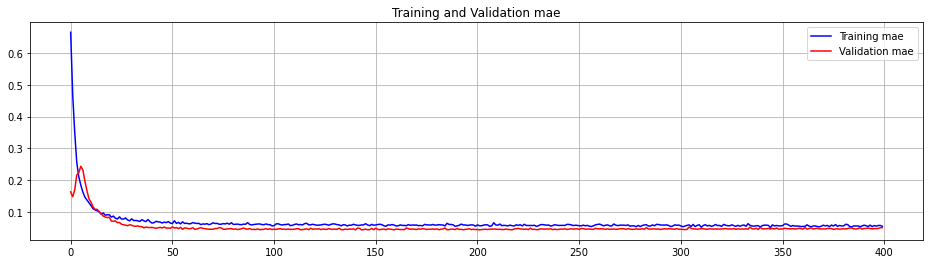

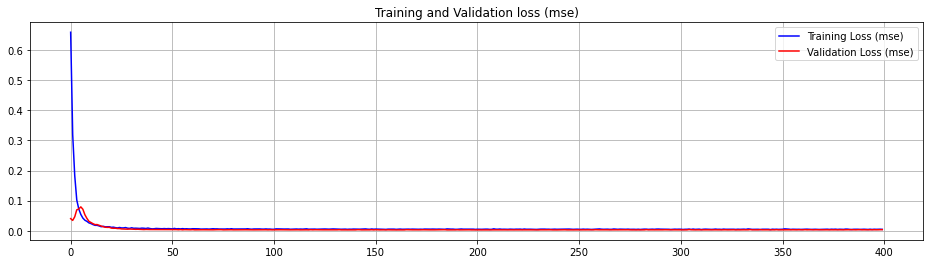

In [6]:
mae1 = history.history['mae']
val_mae1 = history.history['val_mae']
loss1 = history.history['loss']
val_loss1 = history.history['val_loss']

epochs1 = range(len(mae1))

plt.figure(figsize=(16, 4))

plt.plot(epochs1, mae1, 'b', label='Training mae')
plt.plot(epochs1, val_mae1, 'r', label='Validation mae')
plt.title('Training and Validation mae')
plt.grid()
plt.legend()

plt.figure(figsize=(16, 4))

plt.plot(epochs1, loss1, 'b', label='Training Loss (mse)')
plt.plot(epochs1, val_loss1, 'r', label='Validation Loss (mse)')
plt.title('Training and Validation loss (mse)')
plt.grid()
plt.legend()

plt.show()

**Let's take a closer look at the last 50 epochs**

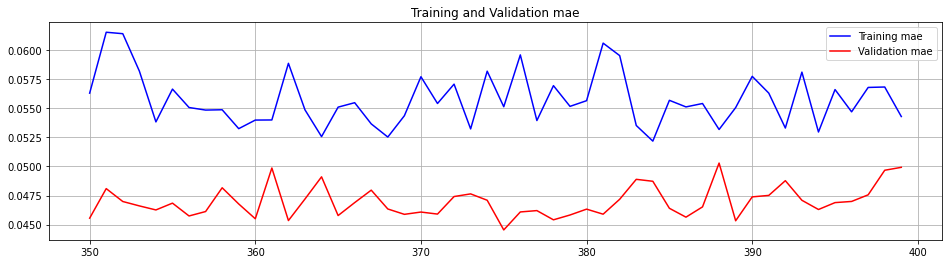

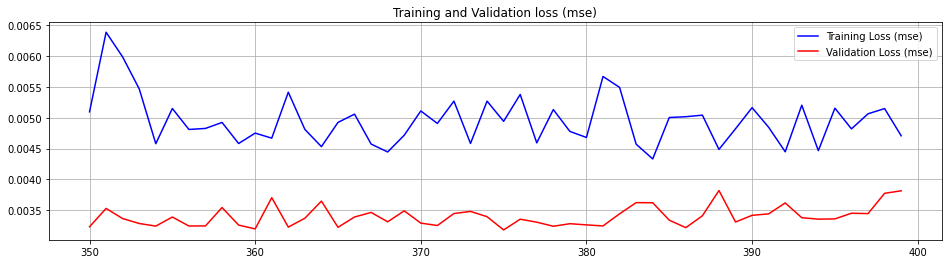

In [7]:
plt.figure(figsize=(16, 4))

plt.plot(epochs1[-50:], mae1[-50:], 'b', label='Training mae')
plt.plot(epochs1[-50:], val_mae1[-50:], 'r', label='Validation mae')
plt.title('Training and Validation mae')
plt.grid()
plt.legend()

plt.figure(figsize=(16, 4))

plt.plot(epochs1[-50:], loss1[-50:], 'b', label='Training Loss (mse)')
plt.plot(epochs1[-50:], val_loss1[-50:], 'r', label='Validation Loss (mse)')
plt.title('Training and Validation loss (mse)')
plt.grid()
plt.legend()

plt.show()

**Now, let's add 50 extra epochs with adagrad as the optimizer (instead of adam)**

5/5 [==============================] - 0s 3ms/step - loss: 0.0031 - mae: 0.0451


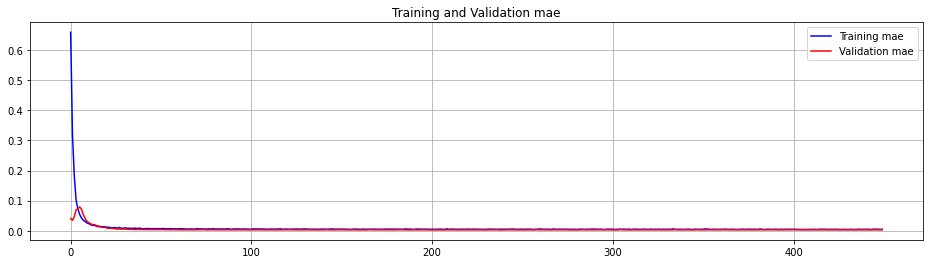

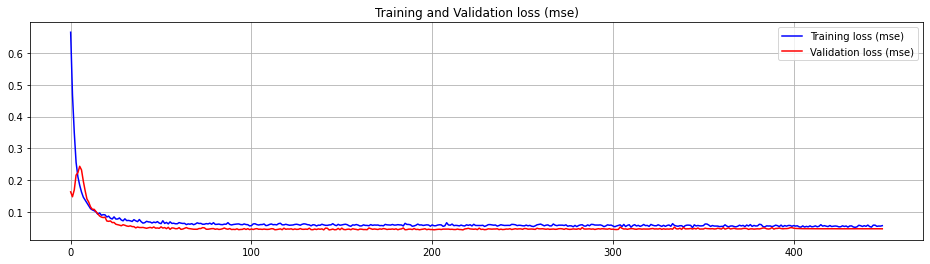

In [8]:
epochs = 50

# Definition of the settings
model.compile(loss = 'mse',
                optimizer = 'adagrad',
                metrics = ['mae'])
        
# Training of the network
history = model.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_data = (X_val, y_val),
                    verbose = 0)
        
test_loss, test_mae = model.evaluate(X_test, y_test)

loss = 'mse'

mae2 = history.history['mae']
val_mae2 = history.history['val_mae']
loss2 = history.history['loss']
val_loss2 = history.history['val_loss']

mae1.extend(mae2)
val_mae1.extend(val_mae2)
loss1.extend(loss2)
val_loss1.extend(val_loss2)

epochs1 = range(len(mae1))

plt.figure(figsize = (16, 4))
plt.plot(epochs1, loss1, 'b', label = 'Training mae')
plt.plot(epochs1, val_loss1, 'r', label = 'Validation mae')
plt.title('Training and Validation mae')
plt.grid()
plt.legend()
        
plt.figure(figsize = (16, 4))
plt.plot(epochs1, mae1, 'b', label = 'Training loss (mse)')
plt.plot(epochs1, val_mae1, 'r', label = 'Validation loss (mse)')
plt.title('Training and Validation loss (mse)')
plt.grid()
plt.legend()

plt.show()

**Let's take a closer look at the last 100 epochs so we can compare the last 50 adam epochs and the last 50 adagrad epochs**

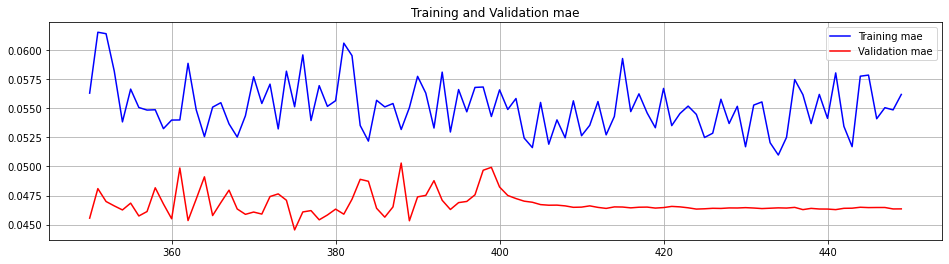

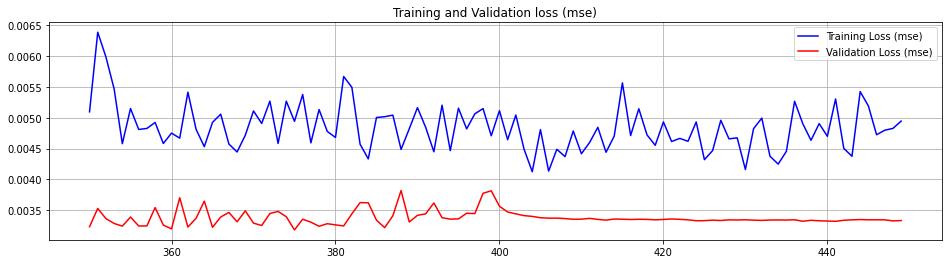

In [9]:
plt.figure(figsize=(16, 4))

plt.plot(epochs1[-100:], mae1[-100:], 'b', label='Training mae')
plt.plot(epochs1[-100:], val_mae1[-100:], 'r', label='Validation mae')
plt.title('Training and Validation mae')
plt.grid()
plt.legend()

plt.figure(figsize=(16, 4))

plt.plot(epochs1[-100:], loss1[-100:], 'b', label='Training Loss (mse)')
plt.plot(epochs1[-100:], val_loss1[-100:], 'r', label='Validation Loss (mse)')
plt.title('Training and Validation loss (mse)')
plt.grid()
plt.legend()

plt.show()

**Thanks, and please let me know your thoughts and suggestions!**